# Creating CNN Using Scratch And Transfer Learning

In [67]:
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import warnings

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Train'

test_path = '/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Test'


In [70]:
# Import the VGG16 library as show below and add preprocessing layer to the front of VGG

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3] , weights = 'imagenet', include_top=False)

In [71]:
# Don't train the existing weight

for layer in mobilnet.layers:
  layer.trainable = False

In [72]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Train/*')

In [73]:
folders

['/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Train/Uninfected',
 '/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Train/Parasite']

In [74]:
len(folders)

2

In [75]:
x = Flatten()(mobilnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Creating the model

model = Model(inputs=mobilnet.input, outputs = prediction)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [76]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [77]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [78]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [79]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [80]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-80-1b4640f8339a>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
13/13 [==============================] - 11s 567ms/step - loss: 0.8498 - accuracy: 0.5962 - val_loss: 0.8040 - val_accuracy: 0.5299
Epoch 2/25
13/13 [==============================] - 7s 572ms/step - loss: 0.4741 - accuracy: 0.7885 - val_loss: 0.7173 - val_accuracy: 0.6119
Epoch 3/25
13/13 [==============================] - 6s 485ms/step - loss: 0.4019 - accuracy: 0.8077 - val_loss: 0.7289 - val_accuracy: 0.6418
Epoch 4/25
13/13 [==============================] - 7s 573ms/step - loss: 0.3973 - accuracy: 0.8293 - val_loss: 0.4487 - val_accuracy: 0.7687
Epoch 5/25
13/13 [==============================] - 6s 484ms/step - loss: 0.2971 - accuracy: 0.8774 - val_loss: 0.4432 - val_accuracy: 0.7910
Epoch 6/25
13/13 [==============================] - 9s 713ms/step - loss: 0.2680 - accuracy: 0.8990 - val_loss: 0.3592 - val_accuracy: 0.8358
Epoch 7/25
13/13 [==============================] - 6s 490ms/step - loss: 0.2498 - accuracy: 0.8990 - val_loss: 0.5040 - val_accuracy: 0.7388
Epoch

# Plotting the loss

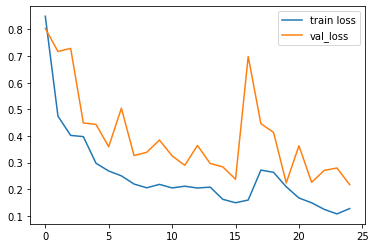

<Figure size 432x288 with 0 Axes>

In [81]:
# plot the loss

plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


 As it show the train loss nad the validation loss is continiously decrasing with the increase in the accuracy

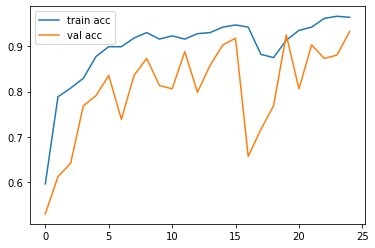

<Figure size 432x288 with 0 Axes>

In [82]:
# plotting the accuracy

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**As it show that the increase in the epochs the train accuracy is more than 90 and the validation is also similar to 90.**

# **Saving the model**

In [83]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

# ***Prediction***

In [84]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 167ms/step


In [85]:
y_pred

array([[1.7333350e-01, 8.2666647e-01],
       [6.9805312e-01, 3.0194688e-01],
       [6.6633254e-01, 3.3366749e-01],
       [7.3839802e-01, 2.6160201e-01],
       [9.7410822e-01, 2.5891732e-02],
       [1.6115381e-01, 8.3884621e-01],
       [8.5928875e-01, 1.4071123e-01],
       [9.9924600e-01, 7.5406145e-04],
       [2.4641285e-02, 9.7535872e-01],
       [9.8598063e-02, 9.0140194e-01],
       [8.3200485e-01, 1.6799520e-01],
       [1.6826575e-01, 8.3173424e-01],
       [9.9997401e-01, 2.6022466e-05],
       [3.1218857e-01, 6.8781149e-01],
       [3.2200786e-01, 6.7799211e-01],
       [8.7491214e-02, 9.1250873e-01],
       [6.0109264e-01, 3.9890736e-01],
       [9.9612719e-01, 3.8728144e-03],
       [1.2345819e-01, 8.7654185e-01],
       [6.2628961e-01, 3.7371036e-01],
       [9.9839896e-01, 1.6010818e-03],
       [9.7525603e-01, 2.4743963e-02],
       [8.8640086e-02, 9.1135997e-01],
       [8.5011435e-01, 1.4988565e-01],
       [2.7081737e-01, 7.2918260e-01],
       [4.5159665e-01, 5.

In [86]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [87]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1])

In [88]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [89]:
model=load_model('model_vgg19.h5')

In [98]:
img = image.load_img('/content/drive/MyDrive/Deep Learning/Malaria detection/Dataset/images.jpg',target_size = (224,224))

In [99]:
x = image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [100]:
x.shape

(224, 224, 3)

In [101]:
x=x/255

In [102]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [103]:
model.predict(img_data)

1/1 [==============================] - 0s 18ms/step


array([[0.9366526 , 0.06334747]], dtype=float32)

In [104]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 16ms/step


In [107]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
